### Fig. 2 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
sys.path.append('/home/caoyuyao/dataset_14T/UID-Moji/src')
from visualization import ObservationMap
from tqdm import tqdm
from utils import if_in_china_index
from matplotlib import font_manager 
font_path = "/mnt/cyy14/data_qg/old_draw/font"
font_files = font_manager.findSystemFonts(fontpaths=font_path)
for file in font_files:
    font_manager.fontManager.addfont(file)
plt.rcParams["font.sans-serif"] = "Arial"

In [ ]:
# v4.1
def plot_user_grid(user_grid, draw_tick=False, lat_0=30, lon_0=103, width=5.2E6, height=5.8E6):
    user_grid[if_in_china_index == 0] = np.NaN
    
    lon_list = np.linspace(70, 140, 141)
    lat_list = np.linspace(0, 55, 111)
    lon_grid, lat_grid = np.meshgrid(lon_list, lat_list)

    obs_map = ObservationMap(llon = 72, rlon = 136, llat = 3, ulat = 55)
    
    if draw_tick:
        obs_map.set_map(coastline = False, south_China_sea = False, province_boundary_color = 'dimgray', grid=True,\
                       tick_label_size=12, lat_ticks=range(10, 60, 10), lon_ticks=range(70,150,10), projection='lcc',\
                       lat_0=lat_0, lat_1=25, lat_2=47, lon_0=lon_0, width=width, height=height, lock_aspect=True)
    else:
        obs_map.set_map(coastline = False, south_China_sea = False, province_boundary_color = 'dimgray',\
                        label_left=0, label_down=0, grid=True, tick_label_size=12, lat_ticks=range(10, 60, 10),\
                        lon_ticks=range(70,150,10), projection='lcc',\
                        lat_0=lat_0, lat_1=25, lat_2=47, lon_0=lon_0, width=width, height=height, lock_aspect=True)
    
    # v3.1
    obs_map.plot(lons=[121,125], lats=[30.5,30.5], linewidth = 1, color = 'black', zorder = 99999)
    obs_map.plot(lons=[123.2,125], lats=[28.5,28.5], linewidth = 1, color = 'black', zorder = 99999)
    obs_map.text(x=125.2, y=30.5, s='A', ha='left',va='center')
    obs_map.text(x=125.2, y=28.5, s='B', ha='left',va='center')

    num_colors = 13
    cmap = plt.cm.get_cmap('turbo', num_colors)

    cs = obs_map.pcolormesh(lon_grid, lat_grid, np.log10(user_grid), cmap = cmap, alpha = 0.75, colorbar = False, inset_clim = [0, 6.5])

    plt.clim(0, 6.5)
    return cs, obs_map

/tmp/ipykernel_2838827/1408661945.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo', num_colors)
/tmp/ipykernel_2838827/1408661945.py:30: RuntimeWarning: divide by zero encountered in log10
  cs = obs_map.pcolormesh(lon_grid, lat_grid, np.log10(user_grid), cmap = cmap, alpha = 0.75, colorbar = False, inset_clim = [0, 6.5])
/tmp/ipykernel_2838827/3424559062.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo', num_colors)
/tmp/ipykernel_2838827/1408661945.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases

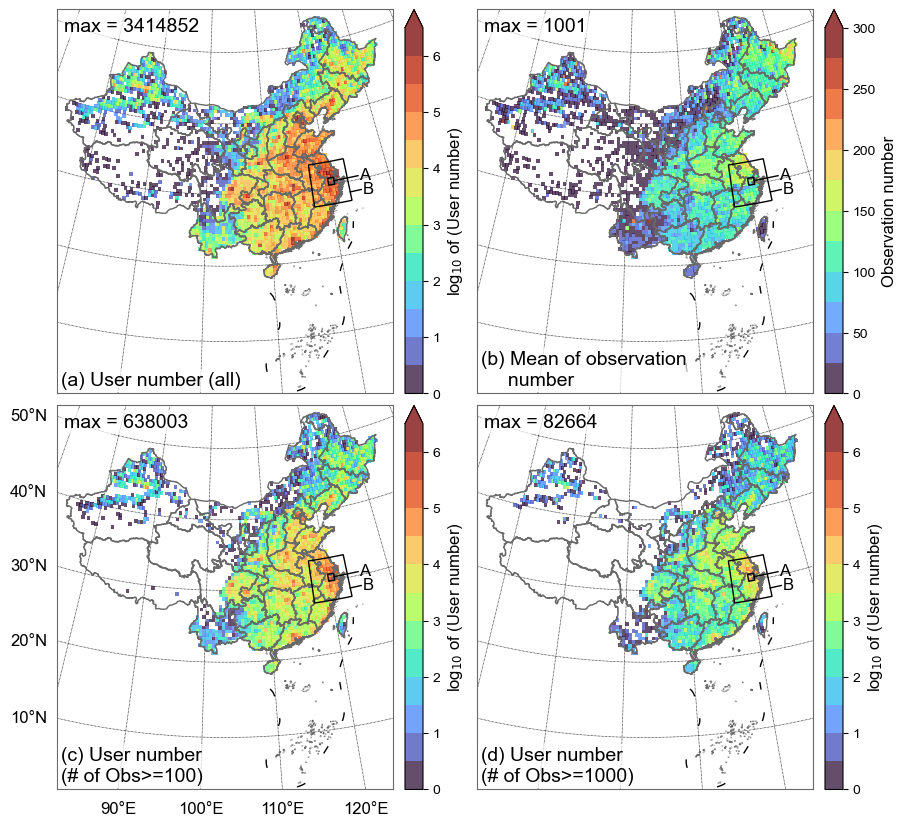

In [ ]:
# v4.1 
fig=plt.figure(1)
fig.set_size_inches(12, 12)
x0=0.28
xc=0.06
y0=0.32
x1=0.01
y1=0.01
mx=0.5-x0-xc-x1/2
my=0.5-y0-y1/2
mc=0.01

# (a)
ax=plt.axes([mx, 1-my-y0, x0, y0])
plt.sca(ax)
'''User grid'''
user_grid = np.load('/mnt/cyy14/Thesis/data/Work2/china_user_distribution/user_number_grid.npy')
cs, obs_map=plot_user_grid(user_grid, lat_0=29, height=5.95E6)
plt.text(0.01, 0.01, s ='(a) User number (all)', fontsize=14, transform=ax.transAxes, verticalalignment="bottom",\
         bbox=dict(pad=2, facecolor='white', edgecolor='dimgrey',lw=0 ,alpha=0.7))
plt.text(0.02, 0.98, s = 'max = {:.0f}'.format(np.nanmax(user_grid)), fontsize=14, transform=ax.transAxes, verticalalignment="top",\
        bbox=dict(pad=2, facecolor='white', edgecolor='dimgrey',lw=0 ,alpha=0.7))
obs_map.add_rectangle_MapAttached(lon_list=[117.2, 123.2], lat_list=[27.3, 33.3], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
obs_map.add_rectangle_MapAttached(lon_list=[120, 121], lat_list=[30, 31], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
ax.spines['right'].set_color('dimgrey')
ax.spines['left'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.tick_params(axis = 'both', length=0, labelcolor='dimgrey')
cbar_ax =plt.axes([mx+x0+mc, 1-my-y0, 0.015, y0])
plt.sca(ax)
cl=plt.colorbar(cs, cax=cbar_ax, extend = 'max')
cl.set_label(r'log$_{10}$ of (User number)', fontsize = 12)




# (b)
'''User Average grid'''
ax=plt.axes([1-mx-x0-xc, 1-my-y0, x0, y0])
#ax = axs[0, 1]
plt.sca(ax)
user_grid = np.load('/mnt/cyy14/Thesis/data/Work2/china_data_length_distribution/Mean_grid.npy')
lon_list = np.linspace(70, 140, 141)
lat_list = np.linspace(0, 55, 111)
lon_grid, lat_grid = np.meshgrid(lon_list, lat_list)

obs_map = ObservationMap(llon = 72, rlon = 136, llat = 3, ulat = 55)
obs_map.set_map(coastline = False, south_China_sea = False, province_boundary_color = 'dimgray',\
                label_left=0, label_down=0, grid=True, tick_label_size=12, lat_ticks=range(10, 60, 10),\
                lon_ticks=range(70,150,10), projection='lcc',lat_0=29, lon_0=103, width=5.2E6, height=5.95E6,\
                lat_1=25, lat_2=47, lock_aspect=True)

num_colors = 12
cmap = plt.cm.get_cmap('turbo', num_colors)

cs = obs_map.pcolormesh(lon_grid, lat_grid, user_grid, cmap = cmap, alpha = 0.75, colorbar = False,\
                        inset_clim = [0, 300]) # --qg
obs_map.add_rectangle_MapAttached(lon_list=[117.2, 123.2], lat_list=[27.3, 33.3], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
obs_map.add_rectangle_MapAttached(lon_list=[120, 121], lat_list=[30, 31], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
obs_map.plot(lons=[121,125], lats=[30.5,30.5], linewidth = 1, color = 'black', zorder = 99999)
obs_map.plot(lons=[123.2,125], lats=[28.5,28.5], linewidth = 1, color = 'black', zorder = 99999)
obs_map.text(x=125.2, y=30.5, s='A', ha='left',va='center')
obs_map.text(x=125.2, y=28.5, s='B', ha='left',va='center')
plt.clim(0, 300)
plt.text(0.01, 0.01, s ='(b) Mean of observation\n     number', fontsize=14, transform=ax.transAxes, verticalalignment="bottom",\
         bbox=dict(pad=2, facecolor='white', edgecolor='dimgrey',lw=0 ,alpha=0.7))
plt.text(0.02, 0.98, s = 'max = {:.0f}'.format(np.nanmax(user_grid)), fontsize=14, transform=ax.transAxes, verticalalignment="top",\
        bbox=dict(pad=2, facecolor='white', edgecolor='dimgrey',lw=0 ,alpha=0.7))
ax.spines['right'].set_color('dimgrey') # left, top, bottom
ax.spines['left'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.tick_params(axis = 'both', length=0, labelcolor='dimgrey')
# colorbar
cbar_ax =plt.axes([1-mx-xc+mc, 1-my-y0, 0.015, y0])
plt.sca(ax)
cl=plt.colorbar(cs, cax=cbar_ax, extend = 'max')
cl.set_label(r'Observation number', fontsize = 12)




#(c)
'''User>=100'''
ax=plt.axes([mx, my, x0, y0])
#ax = axs[1, 0]
plt.sca(ax)

user_grid = np.load('/mnt/cyy14/Thesis/data/Work2/user_number_exceeding_length_threshold/user_grid_above_100.npy')
cs, obs_map=plot_user_grid(user_grid, draw_tick=True, lat_0=29, height=5.95E6)
plt.text(0.01, 0.01, s ='(c) User number\n(# of Obs>=100)', fontsize=14, transform=ax.transAxes, verticalalignment="bottom",\
         bbox=dict(pad=2, facecolor='white', edgecolor='dimgrey',lw=0 ,alpha=0.7))
plt.text(0.02, 0.98, s = 'max = {:.0f}'.format(np.nanmax(user_grid)), fontsize=14, transform=ax.transAxes, verticalalignment="top",\
        bbox=dict(pad=2, facecolor='white', edgecolor='dimgrey',lw=0 ,alpha=0.7))
# 画domain
obs_map.add_rectangle_MapAttached(lon_list=[117.2, 123.2], lat_list=[27.3, 33.3], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
obs_map.add_rectangle_MapAttached(lon_list=[120, 121], lat_list=[30, 31], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
ax.spines['right'].set_color('dimgrey') 
ax.spines['left'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.tick_params(axis = 'both', length=0, labelcolor='dimgrey')
# colorbar
cbar_ax =plt.axes([mx+x0+mc, my, 0.015, y0])
plt.sca(ax)
cl=plt.colorbar(cs, cax=cbar_ax, extend = 'max')
cl.set_label(r'log$_{10}$ of (User number)', fontsize = 12)



#(d)
'''User>=1000'''
ax=plt.axes([1-mx-x0-xc, my, x0, y0])
plt.sca(ax)

user_grid = np.load('/mnt/cyy14/Thesis/data/Work2/user_number_exceeding_length_threshold/user_grid_above_1000.npy')
cs, obs_map=plot_user_grid(user_grid, lat_0=29, height=5.95E6)
plt.text(0.01, 0.01, s = '(d) User number\n(# of Obs>=1000)', fontsize=14, transform=ax.transAxes, verticalalignment="bottom",\
         bbox=dict(pad=2, facecolor='white', edgecolor='dimgrey',lw=0 ,alpha=0.7))
plt.text(0.02, 0.98, s = 'max = {:.0f}'.format(np.nanmax(user_grid)), fontsize=14, transform=ax.transAxes, verticalalignment="top",\
        bbox=dict(pad=2, facecolor='white', edgecolor='dimgrey',lw=0 ,alpha=0.7))
obs_map.add_rectangle_MapAttached(lon_list=[117.2, 123.2], lat_list=[27.3, 33.3], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
obs_map.add_rectangle_MapAttached(lon_list=[120, 121], lat_list=[30, 31], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
ax.spines['right'].set_color('dimgrey') # left, top, bottom
ax.spines['left'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.tick_params(axis = 'both', length=0, labelcolor='dimgrey')
# colorbar
cbar_ax =plt.axes([1-mx-xc+mc, my, 0.015, y0])
plt.sca(ax)
cl=plt.colorbar(cs, cax=cbar_ax, extend = 'max')
cl.set_label(r'log$_{10}$ of (User number)', fontsize = 12)
fig_dir = '/mnt/cyy14/data_qg/old_draw/submit/'
plt.savefig(fig_dir + 'f02.png', dpi = 300, format='png', bbox_inches = 'tight')